## Importing Required Libraries

In [1]:
import numpy as np #helps us with arrays
import pandas as pd #helps us make a pandas dataframe
import seaborn as sns #helps in plots
import matplotlib.pyplot as plt #helps in plots
from sklearn.model_selection import train_test_split,cross_val_score,cross_validate,GridSearchCV,RandomizedSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error
import statsmodels.api as sm
import scipy.stats as stats

from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [2]:
d=pd.read_csv('C:/Users/LENOVO/Desktop/Datasets/insurance.csv') 

# Overview

In [3]:
d.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
d.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [5]:
d.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [6]:
d.shape

(1338, 7)

In [7]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


# Checking for Duplicates & Removing Duplicates

In [8]:
d.duplicated().any()
# is there any duplicate value in our dataset?

True

In [9]:
d.duplicated().sum()
# number of duplicates

1

In [10]:
d[d.duplicated()]
# the duplicated value

,age,sex,bmi,children,smoker,region,charges
581,19,male,30.59,0,no,northwest,1639.5631


In [11]:
d.drop_duplicates(inplace=True)
# dropping the duplicates

In [12]:
d.shape

(1337, 7)

# Checking for Null Values

In [13]:
d.isnull().any()

age         False
sex         False
bmi         False
children    False
smoker      False
region      False
charges     False
dtype: bool

In [14]:
d.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [15]:
# In case there are some null/missing values, we have a few options:-
#1) Delete that datapoint
#2) Imputation (Simple, KNN)

#This code should be use AFTER train_test_split
#from sklearn.impute import SimpleImputer
#imputer=SimpleImputer(strategy="median")
#imputer.fit(dataset_name) #dataset must have numeric values only. If not, create a new dataset after dropping the unnecessary features.
#imputer.statistics_
#d.median().values
#x=imputer.transform(d) # transforming the training set by replacing missing values by the learned medians # a simple NumPy array is generated # to convert in pandas DataFrame write-> d1=pd.DataFrame(x,columns=d.columns)

## NOTE: Imputation is done before scaling generally to keep away from any bias.
## NOTE: Imputation should be done on training set separately and test set should be kept away. If the test set also needs imputation, it should be done separately on the test set again.

# Exploring the Data

In [16]:
d.describe()
# some descriptive statistics of the 'numeric' columns

,age,bmi,children,charges
count,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.663452,1.095737,13279.121487
std,14.044333,6.100468,1.205571,12110.359656
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.290000,0.000000,4746.344000
50%,39.000000,30.400000,1.000000,9386.161300
75%,51.000000,34.700000,2.000000,16657.717450
max,64.000000,53.130000,5.000000,63770.428010


In [17]:
d.describe(include=object)

#to specifically see the summary of categorical features using describe(), use 'include' parameter and write--> describe(include=object)
#'unique' --> levels(categories) of factors/features/variables/columns
#'top' --> level with maximum frequency
#'freq' --> frequency of 'top' i.e, freq of level with max. freq

,sex,smoker,region
count,1337,1337,1337
unique,2,2,4
top,male,no,southeast
freq,675,1063,364


In [18]:
d['sex'].value_counts()

sex
male      675
female    662
Name: count, dtype: int64

In [19]:
d['smoker'].value_counts()

smoker
no     1063
yes     274
Name: count, dtype: int64

In [20]:
d['region'].value_counts()

region
southeast    364
southwest    325
northwest    324
northeast    324
Name: count, dtype: int64

## Data Visualization

array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'bmi'}>],
       [<Axes: title={'center': 'children'}>,
        <Axes: title={'center': 'charges'}>]], dtype=object)

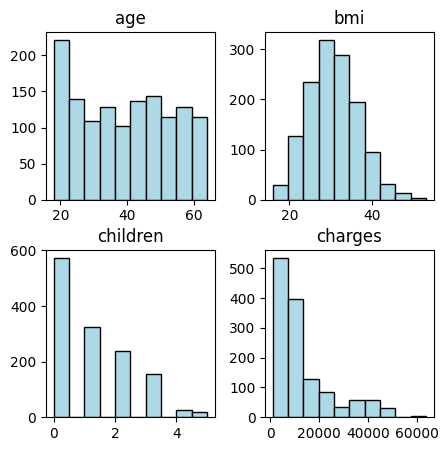

In [21]:
d.hist(figsize=(5,5),color='lightblue',edgecolor='black',grid=False)

<Axes: xlabel='sex'>

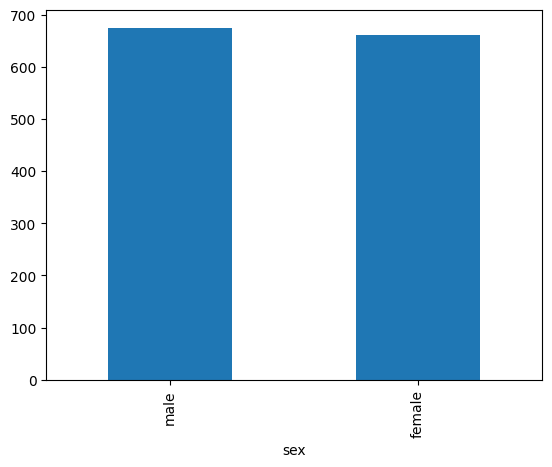

In [22]:
d['sex'].value_counts().plot(kind='bar')

<Axes: xlabel='smoker'>

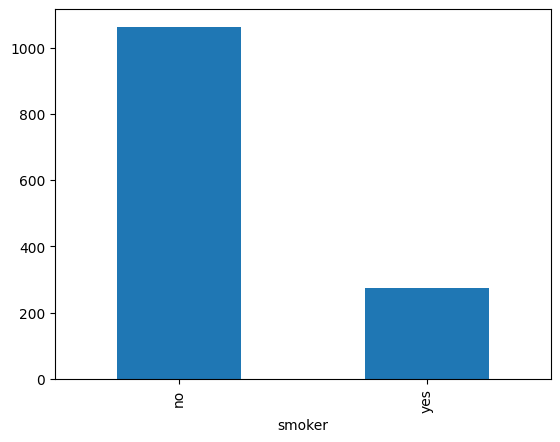

In [23]:
d['smoker'].value_counts().plot(kind='bar')

<Axes: xlabel='region'>

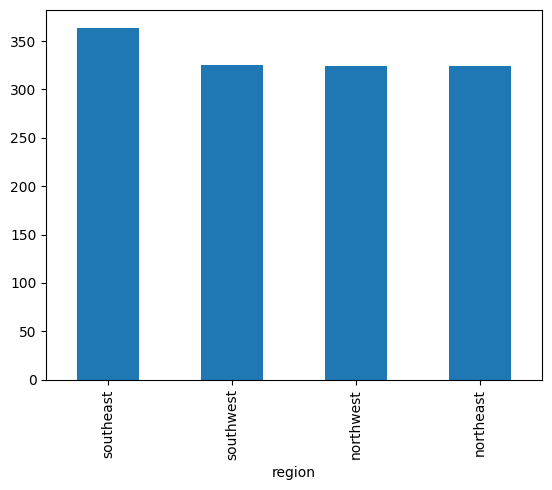

In [24]:
d['region'].value_counts().plot(kind='bar')

### Boxplot

<Axes: >

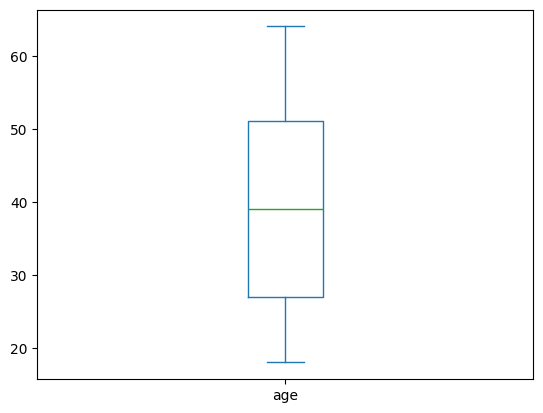

In [25]:
d['age'].plot(kind='box')

<Axes: >

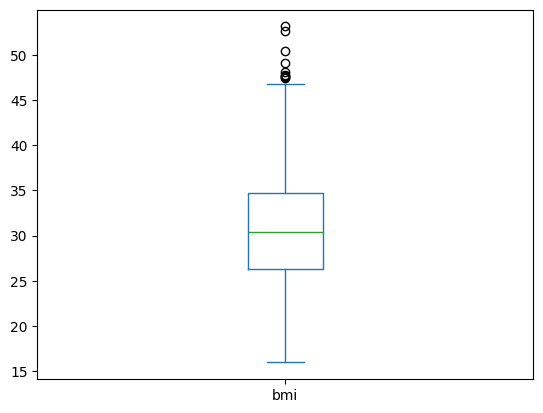

In [26]:
d['bmi'].plot(kind='box')

<Axes: >

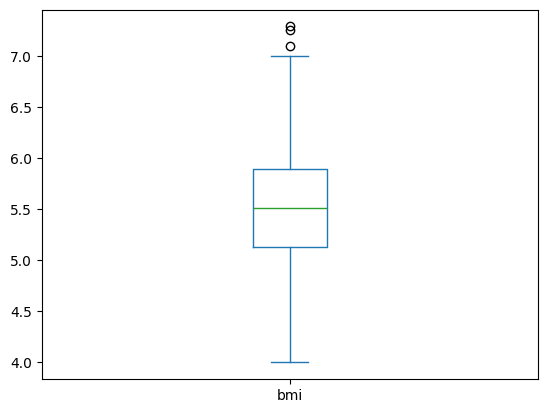

In [27]:
np.sqrt(d['bmi']).plot(kind='box')

<Axes: >

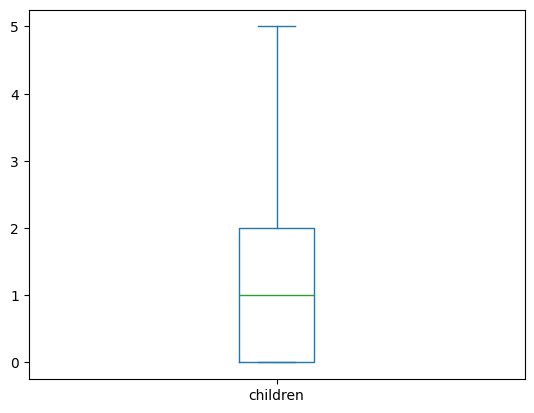

In [28]:
d['children'].plot(kind='box')

<Axes: >

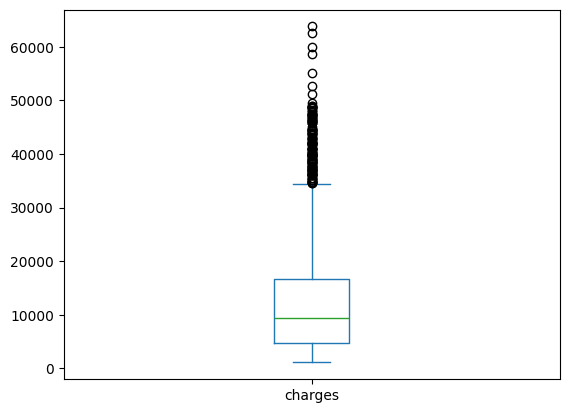

In [29]:
d['charges'].plot(kind='box')

<Axes: >

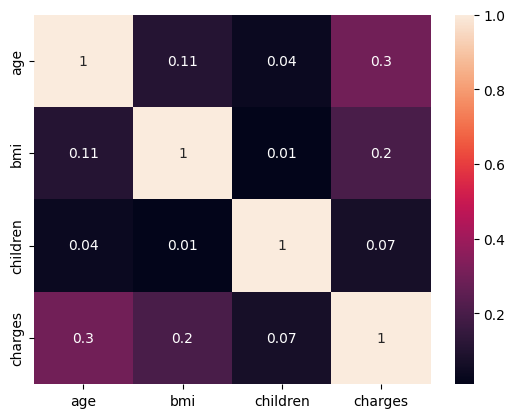

In [30]:
sns.heatmap(round(d[['age','bmi','children','charges']].corr(),2),annot=True)

In [31]:
d[['age','bmi','children','charges']].corr()

,age,bmi,children,charges
age,1.000000,0.109344,0.041536,0.298308
bmi,0.109344,1.000000,0.012755,0.198401
children,0.041536,0.012755,1.000000,0.067389
charges,0.298308,0.198401,0.067389,1.000000


### Scatterplot

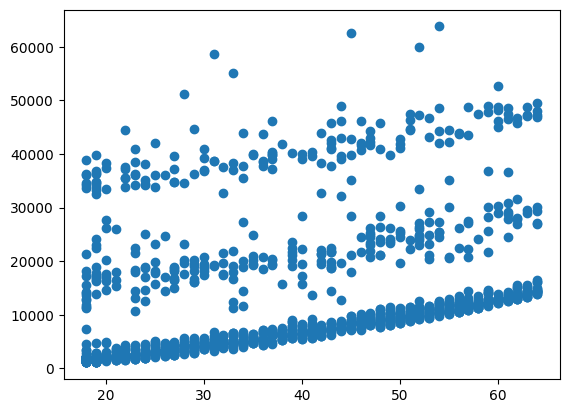

In [32]:
plt.scatter(data=d,x='age',y='charges')

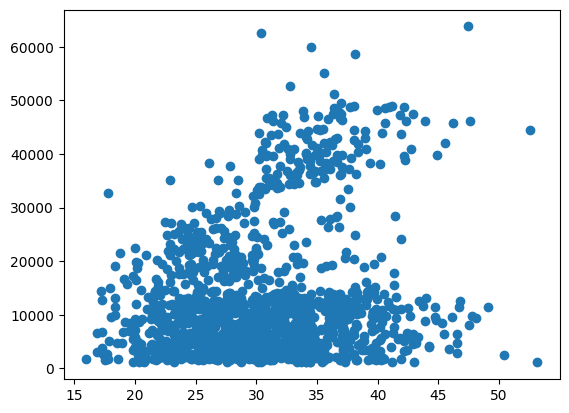

In [33]:
plt.scatter(data=d,x='bmi',y='charges')

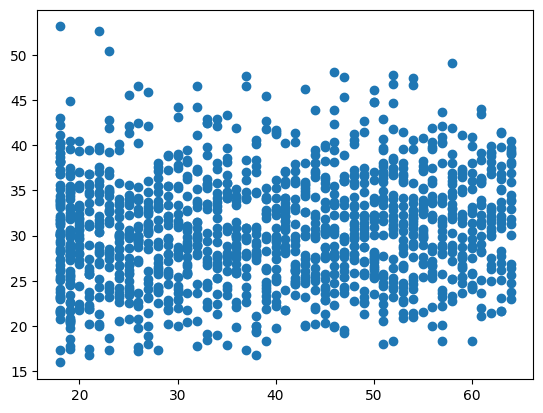

In [34]:
plt.scatter(data=d,x='age',y='bmi')

### Insurance cost for smoker and non smoker

In [35]:
d_smoker=d.groupby("smoker")["charges"].mean()
d_smoker

smoker
no      8440.660307
yes    32050.231832
Name: charges, dtype: float64

<Axes: xlabel='smoker'>

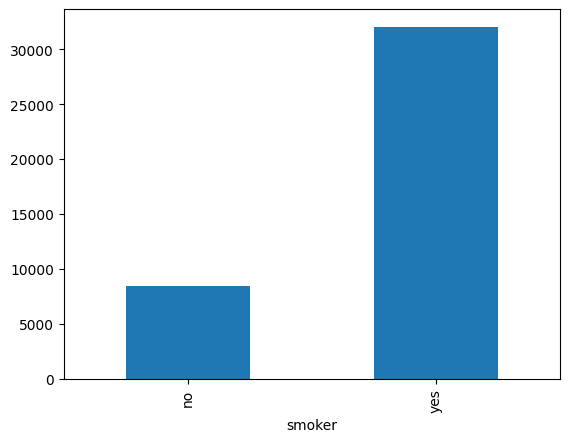

In [36]:
d_smoker.plot(kind='bar',x='smoker',y='charges')

### Insurance cost for male and female

In [37]:
d_sex=d.groupby("sex")["charges"].mean()
d_sex

sex
female    12569.578844
male      13974.998864
Name: charges, dtype: float64

<Axes: xlabel='sex'>

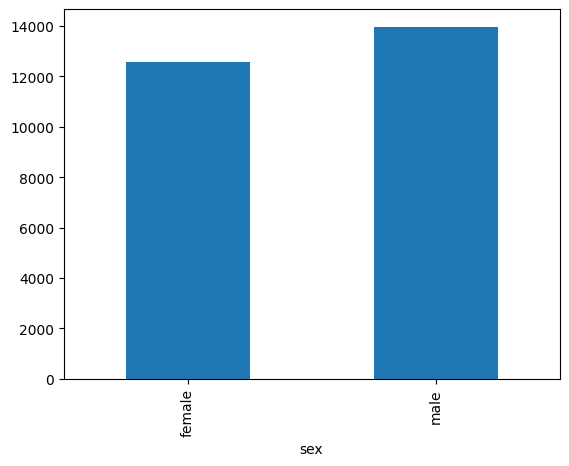

In [38]:
d_sex.plot(kind='bar',x='sex',y='charges')

### Insurance cost region-wise

In [39]:
d_region=d.groupby("region")["charges"].mean()
d_region

region
northeast    13406.384516
northwest    12450.840844
southeast    14735.411438
southwest    12346.937377
Name: charges, dtype: float64

<Axes: xlabel='region'>

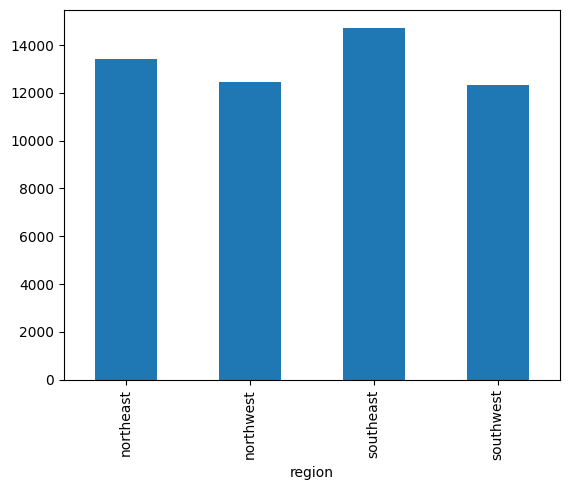

In [40]:
d_region.plot(kind='bar',x='region',y='charges')

### Region-wise BMI

In [41]:
d_region_wise_bmi=d.groupby("region")["bmi"].mean()
d_region_wise_bmi

region
northeast    29.173503
northwest    29.195494
southeast    33.355989
southwest    30.596615
Name: bmi, dtype: float64

<Axes: xlabel='region'>

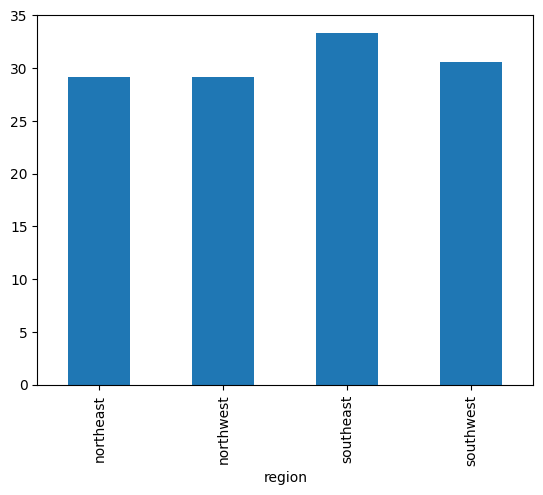

In [42]:
d_region_wise_bmi.plot(kind='bar',x='region',y='bmi')

# -------------

In [43]:
d

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


### Encoding

In [44]:
d.replace({'sex':{'male':1,'female':0}}, inplace=True) #encoding sex column
d.replace({'smoker':{'yes':1,'no':0}}, inplace=True)  #encoding smoker column
d.replace({'region':{'southeast':0,'southwest':1,'northeast':2,'northwest':3}}, inplace=True)  #encoding region column

#OrdinalEncoder , OneHotEncoder can also be used for encoding categorical features into numeric, if required.

In [45]:
# : Splitting the 'features' and the 'target'
#Here, we'll put all the 'features' in variable 'x' and the 'target' in 'y'

x=d.drop(columns='charges', axis=1) # here i'm dropping/excluding the charges column and storing all other columns in x 
# Here axis=1 means we're removing a column ; if we remove a row then we write axis=0

y=d['charges']

In [46]:
x

,age,sex,bmi,children,smoker,region
0,19,0,27.900,0,1,1
1,18,1,33.770,1,0,0
2,28,1,33.000,3,0,0
3,33,1,22.705,0,0,3
4,32,1,28.880,0,0,3
...,...,...,...,...,...,...
1333,50,1,30.970,3,0,3
1334,18,0,31.920,0,0,2
1335,18,0,36.850,0,0,0
1336,21,0,25.800,0,0,1


In [47]:
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1337, dtype: float64

In [48]:
#Here, we'll split data into 'training data' and 'testing data' using the train_test_split function
#For this, we need 4 arrays namely - x_train, x_test, y_train, y_test

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

#We are writing x,y in the train_test_split function because we are going to split x and y. Here x will split into x_train and x_test.
#The 'charges' values corresponding to x_train will go to y_train ; and the 'charges' values corresponding to x_test will go to y_test.
#test_size is the amount of data we are using for testing. Here '0.2' means 20% of the data. 
#It means that remaining 0.8 (80%) of the data will be used as training data.
#random_state controls the shuffling process. It allows you to reproduce the same train test split each time you run the code.

In [49]:
print(x.shape,x_train.shape,x_test.shape) #looking how much data went where

(1337, 6) (1069, 6) (268, 6)


In [50]:
print(y.shape,y_train.shape,y_test.shape) #looking how much data went where

(1337,) (1069,) (268,)


In [51]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
d["age"]=sc.fit_transform(pd.DataFrame(d["age"]))
d["bmi"]=sc.fit_transform(pd.DataFrame(d["bmi"]))
d["children"]=sc.fit_transform(pd.DataFrame(d["children"]))

#Feature Scaling can be done in two common ways:
#1) Min-Max Scaling/ Normalization (MinMaxScaler): brings values in range 0-1 . Range can be changed if required.
#2) Standardization (StandardScaler) : It first subtracts the mean and then divides by standard deviation so that the resultion distn has unit variance.
#--> Standardization is much less affected by outliers, does not bound values to a specific range.

In [52]:
d

,age,sex,bmi,children,smoker,region,charges
0,-1.440418,0,-0.453160,-0.909234,1,1,16884.92400
1,-1.511647,1,0.509422,-0.079442,0,0,1725.55230
2,-0.799350,1,0.383155,1.580143,0,0,4449.46200
3,-0.443201,1,-1.305052,-0.909234,0,3,21984.47061
4,-0.514431,1,-0.292456,-0.909234,0,3,3866.85520
...,...,...,...,...,...,...,...
1333,0.767704,1,0.050269,1.580143,0,3,10600.54830
1334,-1.511647,0,0.206053,-0.909234,0,2,2205.98080
1335,-1.511647,0,1.014490,-0.909234,0,0,1629.83350
1336,-1.297958,0,-0.797524,-0.909234,0,1,2007.94500


### Model Development

In [53]:
#Since we are using linear regression model here, let's load the LinearRegression model

linreg=LinearRegression() #an object of LinearRegression() got stored in 'lin'. From now on, we can use 'lin' 

In [54]:
linreg.fit(x_train,y_train) 

# Model Training

LinearRegression()

### Model Evaluation

#### 1) Linear Regression -------------

In [55]:
y_train_pred_linreg=linreg.predict(x_train) #A prediction on training data
r2_train_linreg=r2_score(y_train,y_train_pred_linreg) #Finding R-squared value for training data and storing it in a variable named r2_train_linreg
mse_train_linreg=mean_squared_error(y_train,y_train_pred_linreg)
print('Train_R-squared value: ',round(r2_train_linreg,4))
#print('Train_Adjusted_R-squared value: ',round(1-(1-r2_train)*(len(y_train)-1)/(len(y_train)-x_train.shape[1]-1),4))
print('Train_RMSE value: ',round(np.sqrt(mse_train_linreg),4))

Train_R-squared value:  0.7296
Train_RMSE value:  6084.9884


In [56]:
y_test_pred_linreg=linreg.predict(x_test) #A prediction on testing data
r2_test_linreg=r2_score(y_test,y_test_pred_linreg) #Finding R-squared value for testing data and storing it in a variable named r2_test_linreg
mse_test_linreg=mean_squared_error(y_test,y_test_pred_linreg)
print('Test_R-squared value: ',round(r2_test_linreg,4))
#print('Train_Adjusted_R-squared value: ',round(1-(1-r2_test)*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1),4))
print('Test_RMSE value: ',round(np.sqrt(mse_test_linreg),4))

Test_R-squared value:  0.8062
Test_RMSE value:  5966.9837


In [57]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data=pd.DataFrame()
vif_data["feature"]=x.columns
vif_data["VIF"]=[variance_inflation_factor(x.values,i)
                 for i in range(len(x.columns))]
print(vif_data)

    feature       VIF
0       age  7.894740
1       sex  2.006224
2       bmi  8.985093
3  children  1.810779
4    smoker  1.257312
5    region  2.366661


Mean of residuals=  -7.051349006823226e-12


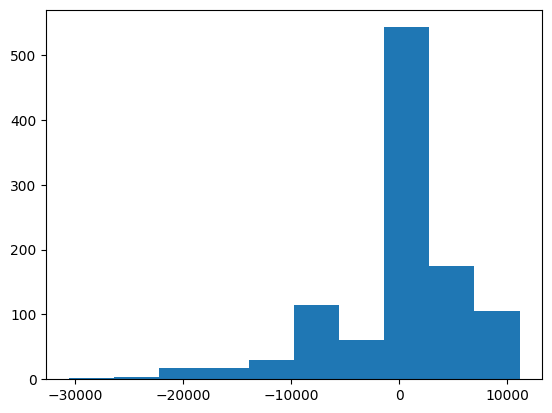

In [58]:
residuals=y_train_pred_linreg-y_train
residuals.hist(grid=False)
print("Mean of residuals= ",np.mean(residuals))

C:\Users\LENOVO\AppData\Roaming\Python\Python311\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Mean of log(residuals)=  7.627348713584751


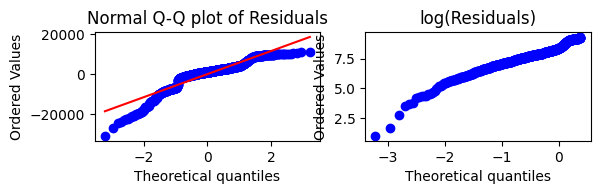

In [59]:
plt.subplot(3,2,1)
stats.probplot(residuals,dist="norm",plot=plt,fit=True) 
plt.title('Normal Q-Q plot of Residuals')

plt.subplot(3,2,2)
stats.probplot(np.log(residuals),dist="norm",plot=plt,fit=True) 
plt.title('log(Residuals)')

print("Mean of log(residuals)= ",np.mean(np.log(residuals)))

Text(0.5, 1.0, 'Q-Q plot of log(Residuals)')

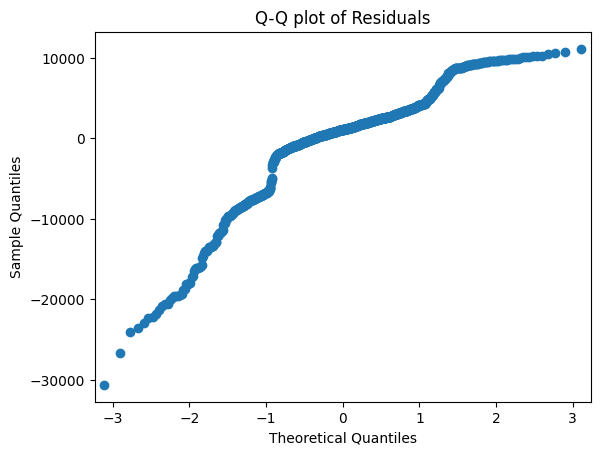

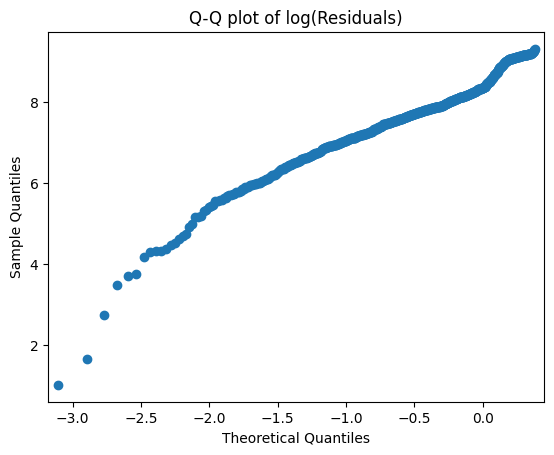

In [60]:
# or use sm.qqplot,

sm.qqplot(residuals) 
plt.title('Q-Q plot of Residuals')

sm.qqplot(np.log(residuals)) 
plt.title('Q-Q plot of log(Residuals)')

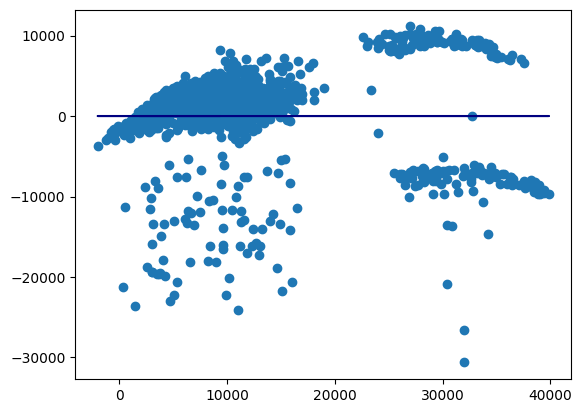

In [62]:
plt.scatter(y_train_pred_linreg,residuals)
plt.plot(y_train_pred_linreg,[0]*len(y_train_pred_linreg),color='navy')

In [64]:
from statsmodels.stats.diagnostic import het_goldfeldquandt as gfq
from statsmodels.compat import lzip
name=['F-statistic','p-value']
gfqtest=gfq(residuals,x_train)
lzip(name,gfqtest)

#Since p-value>0.05 , we fail to reject the null hypothesis that 'no heteroskedasticity' is present. 

[('F-statistic', 0.9455640864422414), ('p-value', 0.7398920512774398)]

In [68]:
from statsmodels.stats.stattools import durbin_watson
dwtest=durbin_watson(residuals)
dwtest

#Since values for durbin_watson test is between 1.5 to 2.5, as a rule of thumb, we consider it normal.

1.9702721425893501

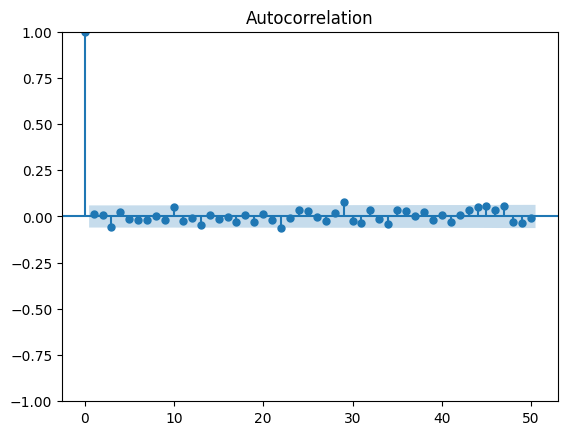

In [69]:
sm.graphics.tsa.plot_acf(residuals,lags=50)
plt.show()

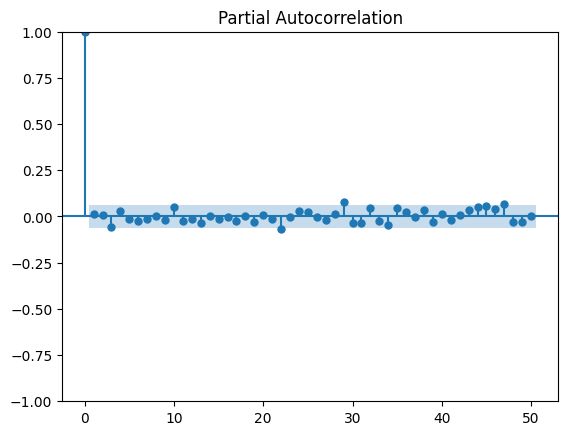

In [70]:
sm.graphics.tsa.plot_pacf(residuals,lags=50)
plt.show()

#### 2) Decision Tree Regressor --------------------

In [71]:
dtree=DecisionTreeRegressor()
dtree.fit(x_train,y_train)

DecisionTreeRegressor()

In [72]:
y_train_pred_dtree=dtree.predict(x_train)
r2_train_dtree=r2_score(y_train,y_train_pred_dtree) 
mse_train_dtree=mean_squared_error(y_train,y_train_pred_dtree)
print('Train_R-squared value: ',round(r2_train_dtree,4))
#print('Train_Adjusted_R-squared value: ',round(1-(1-r2_train)*(len(y_train)-1)/(len(y_train)-x_train.shape[1]-1),4))
print('Train_RMSE value: ',round(np.sqrt(mse_train_dtree),4))

Train_R-squared value:  1.0
Train_RMSE value:  0.0


In [73]:
y_test_pred_dtree=dtree.predict(x_test)
r2_test_dtree=r2_score(y_test,y_test_pred_dtree) 
mse_test_dtree=mean_squared_error(y_test,y_test_pred_dtree)
print('Test_R-squared value: ',round(r2_test_dtree,4))
print('Test_RMSE value: ',round(np.sqrt(mse_test_dtree),4))

Test_R-squared value:  0.7658
Test_RMSE value:  6560.6063


#### 3) KNN Regressor --------------------

In [74]:
knnreg=KNeighborsRegressor()
knnreg.fit(x_train,y_train)

KNeighborsRegressor()

In [75]:
y_train_pred_knnreg=knnreg.predict(x_train) #A prediction on training data
r2_train_knnreg=r2_score(y_train,y_train_pred_knnreg) #Finding R-squared value for training data and storing it in a variable named r2_train
mse_train_knnreg=mean_squared_error(y_train,y_train_pred_knnreg)
print('Train_R-squared value: ',round(r2_train_knnreg,4))
#print('Train_Adjusted_R-squared value: ',round(1-(1-r2_train)*(len(y_train)-1)/(len(y_train)-x_train.shape[1]-1),4))
print('Train_RMSE value: ',round(np.sqrt(mse_train_knnreg),4))

Train_R-squared value:  0.4014
Train_RMSE value:  9052.7856


In [76]:
y_test_pred_knnreg=knnreg.predict(x_test)
r2_test_knnreg=r2_score(y_test,y_test_pred_knnreg) 
mse_test_knnreg=mean_squared_error(y_test,y_test_pred_knnreg)
print('Test_R-squared value: ',round(r2_test_knnreg,4))
print('Test_RMSE value: ',round(np.sqrt(mse_test_knnreg),4))

Test_R-squared value:  0.0795
Test_RMSE value:  13005.8586


#### 4) Random Forest Regressor ------------------

In [77]:
forestreg=RandomForestRegressor()
forestreg.fit(x_train,y_train)

RandomForestRegressor()

In [78]:
y_train_pred_forestreg=forestreg.predict(x_train) #A prediction on training data
r2_train_forestreg=r2_score(y_train,y_train_pred_forestreg) #Finding R-squared value for training data and storing it in a variable named r2_train
mse_train_forestreg=mean_squared_error(y_train,y_train_pred_forestreg)
print('Train_R-squared value: ',round(r2_train_forestreg,4))
#print('Train_Adjusted_R-squared value: ',round(1-(1-r2_train)*(len(y_train)-1)/(len(y_train)-x_train.shape[1]-1),4))
print('Train_RMSE value: ',round(np.sqrt(mse_train_forestreg),4))

Train_R-squared value:  0.9741
Train_RMSE value:  1882.2469


In [79]:
y_test_pred_forestreg=forestreg.predict(x_test)
r2_test_forestreg=r2_score(y_test,y_test_pred_forestreg) 
mse_test_forestreg=mean_squared_error(y_test,y_test_pred_forestreg)
print('Test_R-squared value: ',round(r2_test_forestreg,4))
print('Test_RMSE value: ',round(np.sqrt(mse_test_forestreg),4))

Test_R-squared value:  0.8789
Test_RMSE value:  4716.862


## Cross-Validation

In [80]:
# Linear Regression

result_linreg=cross_validate(linreg,x,y,cv=5,return_train_score=True,scoring='r2')
result_linreg

{'fit_time': array([0.01439905, 0.        , 0.01212788, 0.00756335, 0.00741196]),
 'score_time': array([0.00423813, 0.00898218, 0.0036664 , 0.00099897, 0.00380993]),
 'test_score': array([0.76258417, 0.70684884, 0.77618995, 0.7319327 , 0.75696472]),
 'train_score': array([0.74660312, 0.759233  , 0.7431764 , 0.75482262, 0.74838529])}

In [81]:
train_accuracy_linreg=result_linreg['train_score'].mean()*100
print("Training r2_score: ",round(train_accuracy_linreg,2),'%')

test_accuracy_linreg=result_linreg['test_score'].mean()*100
print("Testing r2_score: ",round(test_accuracy_linreg,2),'%')

Training r2_score:  75.04 %
Testing r2_score:  74.69 %


In [82]:
# KNN Regressor --------------------------------------------------------------------------------------------------

result_knnreg=cross_validate(knnreg,x,y,cv=5,return_train_score=True,scoring='r2')
result_knnreg

{'fit_time': array([0.01038194, 0.01170897, 0.0080111 , 0.00981116, 0.009233  ]),
 'score_time': array([0.00786734, 0.01260138, 0.01230788, 0.00804257, 0.00702786]),
 'test_score': array([0.11494821, 0.05827084, 0.01039684, 0.15124568, 0.10516966]),
 'train_score': array([0.39347982, 0.4213239 , 0.40721706, 0.38722562, 0.39137252])}

In [83]:
train_accuracy_knnreg=result_knnreg['train_score'].mean()*100
print("Training r2_score: ",round(train_accuracy_knnreg,2),'%')

test_accuracy_knnreg=result_knnreg['test_score'].mean()*100
print("Testing r2_score: ",round(test_accuracy_knnreg,2),'%')

#--------------------------------------------------------------------------------------------------------------------

Training r2_score:  40.01 %
Testing r2_score:  8.8 %


In [84]:
# Decision Tree Regressor -----------------------------------------------------------------------------------------------------

result_dtree=cross_validate(dtree,x,y,cv=5,return_train_score=True,scoring='r2')
result_dtree

{'fit_time': array([0.01913571, 0.03538823, 0.02894688, 0.03213716, 0.02515602]),
 'score_time': array([0.01270294, 0.00896811, 0.00416899, 0.00329638, 0.00443339]),
 'test_score': array([0.72757957, 0.69127734, 0.71906758, 0.74929378, 0.71143613]),
 'train_score': array([1.        , 1.        , 0.99833215, 0.99832796, 0.99831808])}

In [85]:
train_accuracy_dtree=result_dtree['train_score'].mean()*100
print("Training r2_score: ",round(train_accuracy_dtree,2),'%')

test_accuracy_dtree=result_dtree['test_score'].mean()*100
print("Testing r2_score: ",round(test_accuracy_dtree,2),'%')

#-------------------------------------------------------------------------------------------------------------------------------

Training r2_score:  99.9 %
Testing r2_score:  71.97 %


In [86]:
# Random Forest Regressor --------------------------------------------------------------------------------------------------

result_forestreg=cross_validate(forestreg,x,y,cv=5,return_train_score=True,scoring='r2')
result_forestreg

{'fit_time': array([1.8332715 , 1.73731399, 1.81626892, 1.66804624, 1.85550237]),
 'score_time': array([0.02890325, 0.02643037, 0.01532054, 0.02189922, 0.02719045]),
 'test_score': array([0.85182052, 0.78239305, 0.86808623, 0.8303395 , 0.85038018]),
 'train_score': array([0.97701078, 0.97903455, 0.97433491, 0.97588518, 0.97546651])}

In [87]:
train_accuracy_forestreg=result_forestreg['train_score'].mean()*100
print("Training r2_score: ",round(train_accuracy_forestreg,2),'%')

test_accuracy_forestreg=result_forestreg['test_score'].mean()*100
print("Testing r2_score: ",round(test_accuracy_forestreg,2),'%')

#-----------------------------------------------------------------------------------------------------------------------------

Training r2_score:  97.63 %
Testing r2_score:  83.66 %


## or,

In [88]:
models=[]
models.append(("Linear Regression", LinearRegression()))
models.append(("KNN", KNeighborsRegressor()))
models.append(("Decision Tree", DecisionTreeRegressor()))
models.append(("Random Forest", RandomForestRegressor()))

for model in models:
    result=cross_validate(model[1],x,y,cv=5,return_train_score=True,scoring='r2')
    print(model[0])
    train_accuracy=result['train_score'].mean()*100
    print("Training Accuracy: ",round(train_accuracy,2),'%')
    test_accuracy=result['test_score'].mean()*100
    print("Testing Accuracy: ",round(test_accuracy,2),'%')
    print("\n")

Linear Regression
Training Accuracy:  75.04 %
Testing Accuracy:  74.69 %


KNN
Training Accuracy:  40.01 %
Testing Accuracy:  8.8 %


Decision Tree
Training Accuracy:  99.9 %
Testing Accuracy:  72.38 %


Random Forest
Training Accuracy:  97.66 %
Testing Accuracy:  83.45 %




In [89]:
#Predicting insurance cost for a random input

input_data=(18,0,36.850,0,0,0)
input_data_as_numpy_array= np.asarray(input_data)
input_data_reshaped=input_data_as_numpy_array.reshape(1,-1)
result1=forestreg.predict(input_data_reshaped)
print('The Medical Insurance Cost (using Random Forest Regressor) for the given input is ',result1[0])

result2=linreg.predict(input_data_reshaped)
print('The Medical Insurance Cost (using Linear Regression) for the given input is ',result2[0])

The Medical Insurance Cost (using Random Forest Regressor) for the given input is  1819.8508360000005
The Medical Insurance Cost (using Linear Regression) for the given input is  4315.57480134397


C:\Users\LENOVO\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\LENOVO\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
